**2022-02-23 `09.2-Advanced-Databases - Working with Flask to Create a Web Application`**

**Objectives**

* Connect to a database using SQLAlchemy.
* Use Flask to create and run a server.
* Retrieve data from a database using GET requests.
* Execute database queries on behalf of the client.
* Return jsonified query results from API endpoints and populate a webpage.

**Resources**
* [SQLAlchemy Features](https://www.sqlalchemy.org/features.html)
* [OOP Explanation (12 min read)](https://medium.com/from-the-scratch/oop-everything-you-need-to-know-about-object-oriented-programming-aee3c18e281b)
* [SQL Alchemy ORM (15 min read)](https://medium.com/dataexplorations/sqlalchemy-orm-a-more-pythonic-way-of-interacting-with-your-database-935b57fd2d4d)
* [SQL Alchemy](https://towardsdatascience.com/sql-queries-in-python-51ef85b92c1e)
* [SQL Alchemy Joins](https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_orm_working_with_joins.htm)
* [Date Tutorial](https://www.w3schools.com/python/python_datetime.asp)
* [Flask Documentation](https://flask.palletsprojects.com/en/2.0.x/)
* [Flask documentation (A Minimal Application)](https://flask.palletsprojects.com/en/2.0.x/quickstart/#a-minimal-application)

**Presentation**
* [09.2-Advanced-Databases - Working with Flask to Create a Web Application](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/09-Advanced-Databases/Slideshows/Data-M_09.2-SQLAlchemy.pdf)

**Install**
* `pip install Flask`

# ==========================================

### 2.01 Everyone Do: Emoji Plotting (0:15)

# Instructions

* Use the inspector to explore the database and print out the table names stored within it.

* Using the inspector, print out the column names and types for each of the tables contained within the SQLite file.

* Reflect the database into a SQLAlchemy class and start a session that can be used to query the database.

* Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results

* Retrieve the "Top 10" `emoji_id` and `scores` from the query using list comprehensions for the `emoji_id` and the `scores`, respectively.  

* Using Matplotlib, create a horizontal bar chart and plot the emoji score in descending order. Use `emoji_char` as the y-axis labels and plot only the top 10 emojis ranked by score.

* Create the same kind of chart using Pandas to plot the data instead of Matplotlib.

* **Hints:**
  * First, load the top 10 results into a Pandas Dataframe. 
  * Set the index to the `emoji_id`.
  * Use `iloc[::-1]` on the DataFrame to reverse the order of emoji score and then use `plot.barh()`. 

## Bonus

* Use Pandas `read_sql_query` to load a query statement directly into a DataFrame.

- - -

In [2]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///01-Evr_EmojiPlotting/Resources/emoji.sqlite", echo=False)

## Explore Database

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [8]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM emoji LIMIT 10').fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect database and Query

In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [10]:
# Start a session to query the database
session = Session(engine)

## Query to get the Emoji Data
* Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [11]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
    order_by(Emoji.score.desc()).all()

* Unpack tuples using list comprehensions

In [12]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
emoji_id = [result[1] for result in results[:10]]
scores = [int(result[2]) for result in results[:10]]

In [13]:
## Plot using Matplotlib

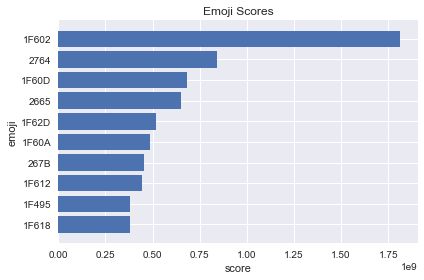

In [14]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax = plt.subplots()
ypos = range(1, len(scores)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel("score")
ax.set_ylabel("emoji")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title("Emoji Scores")
fig.tight_layout()
plt.show()

## Plot using Pandas Plotting
* Load the results into a Pandas DataFrame

In [15]:
# Load the results into a Pandas Dataframe. Set the index to the `emoji_id`
df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
df.set_index('emoji_id', inplace=True, )
df.head(10)

emoji_char       score
emoji_id                       
1F602             😂  1814832150
2764             ❤️   840619939
1F60D             😍   680382416
2665             ♥️   652715459
1F62D             😭   515991922
1F60A             😊   484540701
267B             ♻️   452489849
1F612             😒   441690175
1F495             💕   381679908
1F618             😘   377847645

* Plot using Pandas

In [19]:
# df.set_index("emoji_char").plot()

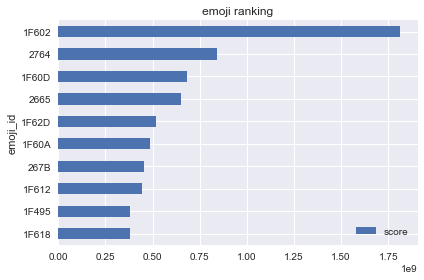

In [16]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.iloc[::-1].plot.barh(title="emoji ranking")
plt.tight_layout()
plt.show()

In [20]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt = session.query(Emoji).\
    order_by(Emoji.score.desc()).statement
df2 = pd.read_sql_query(stmt, session.bind)
df2.head(10)

id emoji_char emoji_id                                 name       score
0   1          😂    1F602               FACE WITH TEARS OF JOY  1814832150
1   2         ❤️     2764                    HEAVY BLACK HEART   840619939
2   3          😍    1F60D  SMILING FACE WITH HEART-SHAPED EYES   680382416
3   4         ♥️     2665                     BLACK HEART SUIT   652715459
4   5          😭    1F62D                   LOUDLY CRYING FACE   515991922
5   6          😊    1F60A       SMILING FACE WITH SMILING EYES   484540701
6   7         ♻️     267B     BLACK UNIVERSAL RECYCLING SYMBOL   452489849
7   8          😒    1F612                        UNAMUSED FACE   441690175
8   9          💕    1F495                           TWO HEARTS   381679908
9  10          😘    1F618                 FACE THROWING A KISS   377847645

In [21]:
# Make a connection to the SQL database
conn = engine.connect()

In [21]:
stmt = session.query(Emoji).\
    order_by(Emoji.score.desc()).statement
df3 = pd.read_sql_query(stmt, conn)
df3.head(10)

id emoji_char emoji_id                                 name       score
0   1          😂    1F602               FACE WITH TEARS OF JOY  1814832150
1   2         ❤️     2764                    HEAVY BLACK HEART   840619939
2   3          😍    1F60D  SMILING FACE WITH HEART-SHAPED EYES   680382416
3   4         ♥️     2665                     BLACK HEART SUIT   652715459
4   5          😭    1F62D                   LOUDLY CRYING FACE   515991922
5   6          😊    1F60A       SMILING FACE WITH SMILING EYES   484540701
6   7         ♻️     267B     BLACK UNIVERSAL RECYCLING SYMBOL   452489849
7   8          😒    1F612                        UNAMUSED FACE   441690175
8   9          💕    1F495                           TWO HEARTS   381679908
9  10          😘    1F618                 FACE THROWING A KISS   377847645

# ==========================================

### 2.02 Instructor Do: Introduction to Flask (0:10)

```python
# 1. import Flask
from flask import Flask

# 2. Create an app, being sure to pass __name__
app = Flask(__name__)

# 3. Define what to do when a user goes to the index route
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return "Welcome to my 'Home' page!"


# 4. Define what to do when a user goes to the /about route
@app.route("/about")
def about():
    print("Server received request for 'About' page...")
    return "Welcome to my 'About' page!"


if __name__ == "__main__":
    app.run(debug=True)

```

# ==========================================

### 2.03 Instructor Do: JSON APIs with jsonify (0:05)

```python
from flask import Flask, jsonify

app = Flask(__name__)

hello_list = ["Hello", "World!"]
hello_dict = {"Hello": "World!"}

@app.route("/")
def home():
    return "Hi"

@app.route("/normal")
def normal():
    return str(hello_list)

@app.route("/jsonified")
def jsonified_list():
    return jsonify(hello_list)

@app.route("/dict")
def dictionary():
    return hello_dict

if __name__ == "__main__":
    app.run(debug=True)

```

# ==========================================

### 2.04 Everyone Do: Hello, Web (0:10)

# Hello, Web

This activity allows students to practice setting up a server and defining basic routes with Flask.

## Instructions

* Create an `app.py`, and make the necessary imports.

* Use Flask to create an `app` instance.

* Use route decorators to define the following endpoints:

  * `/`, or your **index route**: This should return a simple string, such as `"Hello, world!"`, or `"Welcome to my API!"`

  * `/about`, which should return a string containing your **name** and **current location**.

  * `/contact`, which should return a string telling visitors where to email you.

* Finally, add code at the bottom of the file that allows you to run the server from the command line with: `python app.py`.

## Hints

* Refer to the [Flask documentation (A Minimal Application)](https://flask.palletsprojects.com/en/2.0.x/quickstart/#a-minimal-application) as you work through this activity.

- - -

```python
# 1. Import Flask
from flask import Flask

# 2. Create an app
app = Flask(__name__)


# 3. Define index route
@app.route("/")
def index():
    return "Hello, world!"

# 4. Define the about route
@app.route("/about")
def about():
    name = "Peleke"
    location = "Tien Shan"

    return f"My name is {name}, and I live in {location}."

# 5. Define the contact route
@app.route("/contact")
def contact():
    email = "peleke@example.com"

    return f"Questions? Comments? Complaints? Shoot an email to {email}."


# 6. Define main behavior
if __name__ == "__main__":
    app.run(debug=True)

```

# ==========================================

### 2.05 Everyone Do: Justice League jsonify (0:10)

# Justice League API

* In this activity, you will create an API route that returns the superhero name and real name for every member of the DC Comics Justice League.

## Instructions

* Create a file called `app.py` for your Flask app.

* Define a Python dictionary containing the superhero name and real name for each member of the DC Comics Justice League (Superman, Batman, Wonder Woman, Green Lantern, Flash, Aquaman, and Cyborg).

  * You can gather that information here: [Justice League](https://en.wikipedia.org/wiki/Justice_League)

  * Only gather the information for the 7 characters listed above.

* Create a **GET** route called `/api/v1.0/justice-league`.

  * Inside of your GET route, create a function called `justice_league` that will use `jsonify` to convert the dictionary of Justice League members to a JSON object and return that data as a request.

* Define a root route `/` that will return the usage statement for your API.

- - -

```python
from flask import Flask, jsonify

# Dictionary of Justice League
justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent/Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league"
    )


if __name__ == "__main__":
    app.run(debug=True)

```

# ==========================================

### 2.06 Instructor Do: Routes with Variable Paths (0:05)

```python
from flask import Flask, jsonify

justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league<br/>"
        f"/api/v1.0/justice-league/Arthur%20Curry<br/>"
        f"/api/v1.0/justice-league/Bruce%20Wayne<br/>"
        f"/api/v1.0/justice-league/Victor%20Stone<br/>"
        f"/api/v1.0/justice-league/Barry%20Allen<br/>"
        f"/api/v1.0/justice-league/Hal%20Jordan<br/>"
        f"/api/v1.0/justice-league/Clark%20Kent%20Kal-El<br/>"
        f"/api/v1.0/justice-league/Princess%20Diana"
    )


@app.route("/api/v1.0/justice-league/<real_name>")
def justice_league_character(real_name):
    """Fetch the Justice League character whose real_name matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = real_name.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["real_name"].replace(" ", "").lower()

        if search_term == canonicalized:
            return character

    return {"error": f"Character with real_name {real_name} not found."}, 404


if __name__ == "__main__":
    app.run(debug=True)

```

# ==========================================

### 2.07 Students Do: Routes with Variable Rules (0:10)

# Justice League API - Continued

* In this activity, you will add an additional API route that returns json for a Python Dictionary containing an individual superheroes information.

## Instructions

* Using the last activity as a starting point, add code to allow for getting a specific hero's information based on their superhero name.

* The functionality for the new `<superhero>` route closely mirrors that of the `<real_name>` route from the instructor demonstration.

* The new route is identical to the `<real_name>` route; the only difference is that you'll substitute `<real_name>` with `<superhero>`, and add `superhero` before defining the parameter to capture.

* As an alternative to defining the two **specific** routes, you can define a route that takes **two** variable rules: `<key>` and `<value>`, i.e., `@app.route("/api/v1.0/justice-league/<key>/<value>")`.

- - -

```python
from flask import Flask, jsonify

justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league<br/>"
        f"/api/v1.0/justice-league/superhero/aquaman<br/>"
        f"/api/v1.0/justice-league/superhero/batman<br/>"
        f"/api/v1.0/justice-league/superhero/cyborg<br/>"
        f"/api/v1.0/justice-league/superhero/flash<br/>"
        f"/api/v1.0/justice-league/superhero/greenlantern<br/>"
        f"/api/v1.0/justice-league/superhero/superman<br/>"
        f"/api/v1.0/justice-league/superhero/wonderwoman"
    )


@app.route("/api/v1.0/justice-league/real_name/<real_name>")
def justice_league_by_real_name(real_name):
    """Fetch the Justice League character whose real_name matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = real_name.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["real_name"].replace(" ", "").lower()

        if search_term == canonicalized:
            return character

    return {"error": f"Character with real_name {real_name} not found."}, 404


@app.route("/api/v1.0/justice-league/superhero/<superhero>")
def justice_league_by_superhero__name(superhero):
    """Fetch the Justice League character whose superhero matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = superhero.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["superhero"].replace(" ", "").lower()

        if search_term == canonicalized:
            return character

    return {"error": "Character not found."}, 404


if __name__ == "__main__":
    app.run(debug=True)

```

# ==========================================

### 2.08 Instructor Do: Flask with ORM (0:10)

```python
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify


#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///titanic.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Passenger = Base.classes.passenger

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/names<br/>"
        f"/api/v1.0/passengers"
    )


@app.route("/api/v1.0/names")
def names():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()

    session.close()

    # Convert list of tuples into normal list
    all_names = list(np.ravel(results))

    return jsonify(all_names)


@app.route("/api/v1.0/passengers")
def passengers():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of passenger data including the name, age, and sex of each passenger"""
    # Query all passengers
    results = session.query(Passenger.name, Passenger.age, Passenger.sex).all()

    session.close()

    # Create a dictionary from the row data and append to a list of all_passengers
    all_passengers = []
    for name, age, sex in results:
        passenger_dict = {}
        passenger_dict["name"] = name
        passenger_dict["age"] = age
        passenger_dict["sex"] = sex
        all_passengers.append(passenger_dict)

    return jsonify(all_passengers)


if __name__ == '__main__':
    app.run(debug=True)

```

# ==========================================

### 2.09 Everyone Do: Chinook Database Analysis (0:15)

# Chinook Database Analysis

* In this activity, you will complete some exploratory analysis of the [chinook](https://chinookdatabase.codeplex.com/wikipage?title=Chinook_Schema&referringTitle=Home) database.

## Instructions

* Create a Jupyter Notebook for your analysis.

* Create a SQLAlchemy engine to the database `chinook.sqlite`.

* Use `automap_base` to reflect the database tables.

* Create references to the `invoices` and `invoice_items` tables called `Invoices` and `Items`.

* Create a meta data object to hold the reflected table schema. 

* Create a table object and use `autoload=True` and `autoload_with=eninge` to define the columns from the `invoices` and `invoice_items` tables.

* Get the column names using the `columns.keys()`methods on each table object.

* Create a SQLALchemy ORM session object.

* Design a query that lists all of the billing countries found in the invoices table.

* Design a query that lists the invoices totals for each billing country and sort the output in descending order.

  * The results tuple should contain the country name and the invoice total for that country using all records in the invoices table.

* Design a query that lists all of the Billing Postal Codes for the USA.

* Calculate the Item Totals **sum(UnitPrice \* Quantity)** for the USA.

  * Return the value as a scalar floating point number.

* Calculate the invoice items totals **sum(UnitPrice \* Quantity)** for each Billing Postal Code for the USA.

- - -

In [25]:
# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Import Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table

In [27]:
### Using SQLAlchemy ORM to reflect and map the tables¶

In [28]:
# Create an engine for the chinook.sqlite database
engine = create_engine("sqlite:///09-Evr_Chinook_Db_Analysis/Resources/chinook.sqlite", echo=False)

In [29]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoice_items',
 'invoices',
 'tracks',
 'media_types',
 'playlists']

In [30]:
# Save a reference to the invoices table as `Invoices`
Invoices = Base.classes.invoices

In [31]:
# Save a reference to the invoice_items table as `Items`
Items = Base.classes.invoice_items

In [32]:
### Use the Metadata and Table object to describe the table and columns.

In [33]:
#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

In [34]:
# Create a table object for  the `invoices` and `invoice_items` tables
# use 'autoload' and 'autoload_with' to define the columns from the table. 
Invoices_table = Table('invoices', metadata, autoload=True, autoload_with=engine)
Invoice_items_table = Table('invoice_items', metadata, autoload=True, autoload_with=engine)

In [35]:
# Get the column names using the 'column.keys()' methods on the table object. 
print(Invoices_table.columns.keys())
print(Invoice_items_table.columns.keys())

['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']
['InvoiceLineId', 'InvoiceId', 'TrackId', 'UnitPrice', 'Quantity']


In [36]:
### Use Python to query the tables. 

In [37]:
# Create a database session object
session = Session(engine)

In [38]:
# List all of the countries found in the invoices table
session.query(Invoices.BillingCountry).group_by(Invoices.BillingCountry).all()

# Alternative Solution using `distinct`
# session.query(Invoices.BillingCountry).distinct().all()

[('Argentina',),
 ('Australia',),
 ('Austria',),
 ('Belgium',),
 ('Brazil',),
 ('Canada',),
 ('Chile',),
 ('Czech Republic',),
 ('Denmark',),
 ('Finland',),
 ('France',),
 ('Germany',),
 ('Hungary',),
 ('India',),
 ('Ireland',),
 ('Italy',),
 ('Netherlands',),
 ('Norway',),
 ('Poland',),
 ('Portugal',),
 ('Spain',),
 ('Sweden',),
 ('USA',),
 ('United Kingdom',)]

In [39]:
# Design a query that lists the invoices totals for each billing country 
# and sort the output in descending order.
session.query(Invoices.BillingCountry, func.sum(Invoices.Total)).\
    group_by(Invoices.BillingCountry).\
    order_by(func.sum(Invoices.Total).desc()).all()

[('USA', Decimal('523.06')),
 ('Canada', Decimal('303.96')),
 ('France', Decimal('195.10')),
 ('Brazil', Decimal('190.10')),
 ('Germany', Decimal('156.48')),
 ('United Kingdom', Decimal('112.86')),
 ('Czech Republic', Decimal('90.24')),
 ('Portugal', Decimal('77.24')),
 ('India', Decimal('75.26')),
 ('Chile', Decimal('46.62')),
 ('Ireland', Decimal('45.62')),
 ('Hungary', Decimal('45.62')),
 ('Austria', Decimal('42.62')),
 ('Finland', Decimal('41.62')),
 ('Netherlands', Decimal('40.62')),
 ('Norway', Decimal('39.62')),
 ('Sweden', Decimal('38.62')),
 ('Poland', Decimal('37.62')),
 ('Italy', Decimal('37.62')),
 ('Denmark', Decimal('37.62')),
 ('Australia', Decimal('37.62')),
 ('Argentina', Decimal('37.62')),
 ('Spain', Decimal('37.62')),
 ('Belgium', Decimal('37.62'))]

In [40]:
# List all of the Billing Postal Codes for the USA.
results = session.query(Invoices.BillingPostalCode).\
    filter(Invoices.BillingCountry == 'USA').group_by(Invoices.BillingPostalCode).all()
results

[('10012-2612',),
 ('2113',),
 ('32801',),
 ('53703',),
 ('60611',),
 ('76110',),
 ('84102',),
 ('85719',),
 ('89503',),
 ('94040-111',),
 ('94043-1351',),
 ('95014',),
 ('98052-8300',)]

In [41]:
# Calculate the Item Totals (sum(UnitPrice * Quantity)) for the USA
session.query(func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == 'USA').scalar()

Decimal('523.0600000000')

In [42]:
# Calculate the Item Totals `sum(UnitPrice * Quantity)` for each Billing Postal Code in the USA
# Sort the results in descending order by Total
session.query(Invoices.BillingPostalCode, func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == 'USA').\
    group_by(Invoices.BillingPostalCode).\
    order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()

[('76110', Decimal('47.6200000000')),
 ('60611', Decimal('43.6200000000')),
 ('84102', Decimal('43.6200000000')),
 ('53703', Decimal('42.6200000000')),
 ('94040-111', Decimal('39.6200000000')),
 ('98052-8300', Decimal('39.6200000000')),
 ('32801', Decimal('39.6200000000')),
 ('95014', Decimal('38.6200000000')),
 ('94043-1351', Decimal('37.6200000000')),
 ('89503', Decimal('37.6200000000')),
 ('85719', Decimal('37.6200000000')),
 ('2113', Decimal('37.6200000000')),
 ('10012-2612', Decimal('37.6200000000'))]

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "09.2-Advanced-Databases - Working with Flask to Create a Web Application"
objectives = [
    "Connect to a database using SQLAlchemy",
    "Use Flask to create and run a server",
    "Retrieve data from a database using GET requests",
    "Execute database queries on behalf of the client",
    "Return jsonified query results from API endpoints and populate a webpage",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))